In [3]:
import xarray as xr
import geopandas as gpd

land = 'data/gshhs/GSHHS_shp/f/GSHHS_f_L1.shp'

land = gpd.read_file(land)

In [4]:
lon_min,lon_max = -66,-62
lat_min,lat_max = 9,13

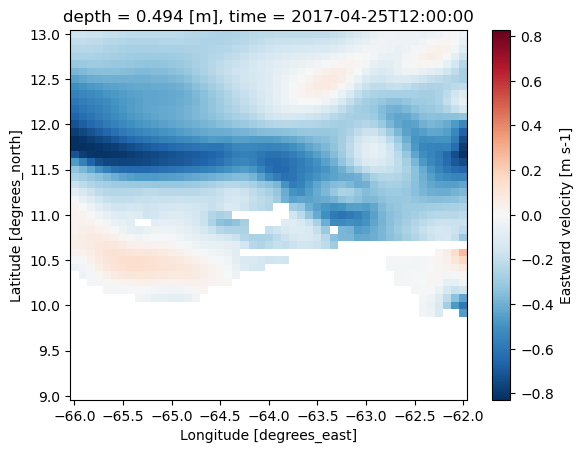

In [18]:
ds = xr.open_mfdataset('/Users/iatake/Downloads/Simulation results/V2.01/original/paria_casestudy/METOCE_INP/ORIGINAL/OCE/mercatorpsy4v3r1_gl12_mean_20170425_R20170503.nc')
ds_rec = ds.sel(longitude=slice(lon_min,lon_max),latitude=slice(lat_min,lat_max))
ds_rec.isel(depth=0).uo.plot()

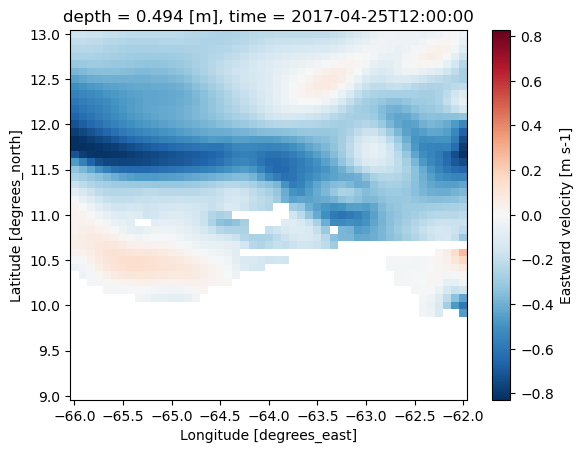

In [19]:
ds = xr.open_mfdataset('/Users/iatake/Dropbox (CMCC)/Work/MEDSLIK-II and Pyslick/Medslik-II/cases/paria/oce_files/Sea_Med_slice_20170425_Paria.nc')
ds_rec.isel(depth=0).uo.plot()

In [57]:
ds['longitude'] = ds.longitude -180
ds

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 4)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2017-04-23 ... 2017-04-23T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(4, 241, 480), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(4, 241, 480), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.6
    history:      Wed Mar 04 14:58:05 2020: cdo splitday _grib2netcdf-atls13-...
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...

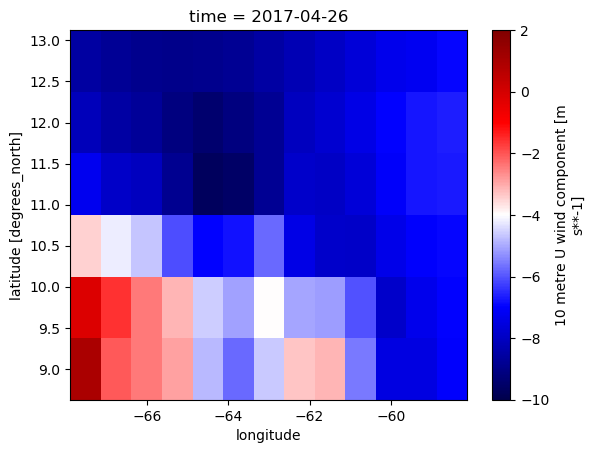

In [33]:
ds = xr.open_mfdataset('/Users/iatake/Downloads/Simulation results/V2.01/original/paria_casestudy/METOCE_INP/ORIGINAL/MET/20170426.nc')
ds['longitude'] = ds.longitude -360

lon_min,lon_max = -68,-58
lat_min,lat_max = 9,13

rec = ds.isel(time=0)
rec = rec.sel(longitude=slice(lon_min,lon_max),latitude=slice(lat_max,lat_min))

rec.u10.plot(vmin=-10,vmax=2,cmap='seismic')

In [34]:
# Cropping to a smaller area
shp = land.cx[lon_min:lon_max, lat_min:lat_max]

#shp with linestring instead of polygons
shp['geometry'] = shp.geometry.boundary

# Cropping the selected linestrings to the same bounding box
shp = shp.clip_by_rect(lon_min,lat_min, lon_max,lat_max)

# Removing empty geometries
# shp = shp[~shp.is_empty]

#Transforming it back again to geodataframe
shp = gpd.GeoDataFrame(geometry = shp)

#removing any multiline strings left on the shapefile
shp = shp.explode()

/Users/iatake/anaconda3/envs/py311/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/k4/jt3tnjj96t551zphcp5z9t5w0000gp/T/ipykernel_39932/4047837951.py:17: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  shp = shp.explode()


In [58]:
shp

geometry
4      0  LINESTRING (-66.00000 10.40542, -65.99961 10.4...
       1  LINESTRING (-62.00000 10.64222, -62.00042 10.6...
298    0  LINESTRING (-64.03256 10.99542, -64.02714 11.0...
1048   0  LINESTRING (-65.42294 10.91750, -65.42294 10.9...
1424   0  LINESTRING (-62.79294 10.42667, -62.79294 10.4...
...                                                     ...
155541 0  LINESTRING (-63.96958 10.67914, -63.96958 10.6...
155705 0  LINESTRING (-64.59292 10.25831, -64.59294 10.2...
156085 0  LINESTRING (-64.64464 10.26833, -64.64464 10.2...
157370 0  LINESTRING (-63.47125 10.68167, -63.47125 10.6...
170010 0  LINESTRING (-64.04461 10.87336, -64.04422 10.8...

[139 rows x 1 columns]

In [52]:
gem

geometry
4      0 0  LINESTRING (-66.00000 10.40542, -65.99961 10.4...
       1 0  LINESTRING (-62.00000 10.64222, -62.00042 10.6...
298    0 0  LINESTRING (-64.03256 10.99542, -64.02714 11.0...
1048   0 0  LINESTRING (-65.42294 10.91750, -65.42294 10.9...
1424   0 0  LINESTRING (-62.79294 10.42667, -62.79294 10.4...
...                                                       ...
155541 0 0  LINESTRING (-63.96958 10.67914, -63.96958 10.6...
155705 0 0  LINESTRING (-64.59292 10.25831, -64.59294 10.2...
156085 0 0  LINESTRING (-64.64464 10.26833, -64.64464 10.2...
157370 0 0  LINESTRING (-63.47125 10.68167, -63.47125 10.6...
170010 0 0  LINESTRING (-64.04461 10.87336, -64.04422 10.8...

[139 rows x 1 columns]